In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_gaussian_quantiles
# Construct dataset
# Gaussian 1
X1, y1 = make_gaussian_quantiles(cov=3.,
                                 n_samples=1000, n_features=2,
                                 n_classes=2, random_state=1)
X1 = pd.DataFrame(X1,columns=['x','y'])
y1 = pd.Series(y1)
# Gaussian 2
X2, y2 = make_gaussian_quantiles(mean=(4, 4), cov=1,
                                 n_samples=500, n_features=2,
                                 n_classes=2, random_state=1)
X2 = pd.DataFrame(X2,columns=['x','y'])
y2 = pd.Series(y2)
# Combine the gaussians
X1.shape
X2.shape
X=X1*X2
df = pd.DataFrame(np.concatenate((X1, X2)))
y = pd.Series(np.concatenate((y1, - y2 + 1)))

In [9]:
df['y'] = y
df['y'].value_counts()

0    750
1    750
Name: y, dtype: int64

In [10]:
df = df.sample(1500)[0:1000]

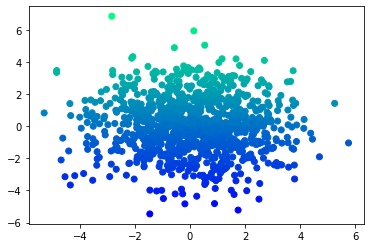

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X1.iloc[:,0],X1.iloc[:,1],c=X1.iloc[:,-1],cmap='winter')

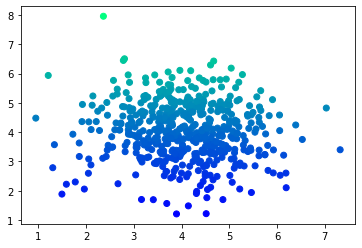

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X2.iloc[:,0],X2.iloc[:,1],c=X2.iloc[:,-1],cmap='winter')

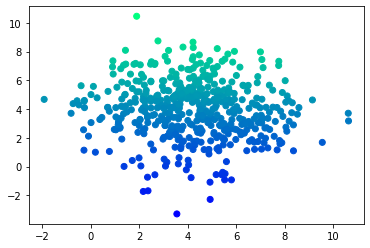

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=X.iloc[:,-1],cmap='winter')

In [15]:
X=X1+X2

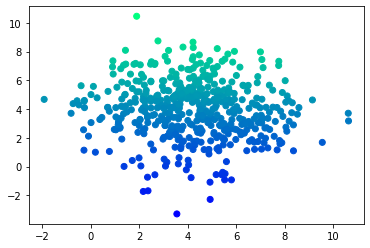

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=X.iloc[:,-1],cmap='winter')

In [17]:
# Log of the odds
df['pre1'] = np.log(494/506)

In [18]:
np.log(494/506)

-0.024001152099543014

In [19]:
df

,0,1,y,pre1
988,-1.311944,-0.628121,0,-0.024001
329,-3.710861,-1.437895,1,-0.024001
391,1.963746,-1.905068,1,-0.024001
284,-0.904748,-0.639570,0,-0.024001
49,0.683169,1.256642,0,-0.024001
...,...,...,...,...
619,0.134790,1.071066,0,-0.024001
1210,4.494342,2.505806,0,-0.024001
655,0.478224,-0.427845,0,-0.024001
16,2.268477,-2.000489,1,-0.024001


In [20]:
# Calculating probability
p = np.exp(-0.024001)/(1+np.exp(-0.024001))

In [21]:
p

0.4940000380194102

In [22]:
df['pre1'] = 0.5

In [23]:
df

,0,1,y,pre1
988,-1.311944,-0.628121,0,0.5
329,-3.710861,-1.437895,1,0.5
391,1.963746,-1.905068,1,0.5
284,-0.904748,-0.639570,0,0.5
49,0.683169,1.256642,0,0.5
...,...,...,...,...
619,0.134790,1.071066,0,0.5
1210,4.494342,2.505806,0,0.5
655,0.478224,-0.427845,0,0.5
16,2.268477,-2.000489,1,0.5


In [25]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_leaf_nodes=4)
tree1.fit(X1.iloc[:,0:2],X1.iloc[:,-1])

DecisionTreeRegressor(max_leaf_nodes=4)

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.109\nsquared_error = 3.02\nsamples = 1000\nvalue = 0.046'),
 Text(0.25, 0.5, 'x[1] <= -1.674\nsquared_error = 1.133\nsamples = 522\nvalue = -1.273'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.626\nsamples = 154\nvalue = -2.636'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.243\nsamples = 368\nvalue = -0.703'),
 Text(0.75, 0.5, 'x[1] <= 1.84\nsquared_error = 1.105\nsamples = 478\nvalue = 1.487'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.253\nsamples = 328\nvalue = 0.907'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.622\nsamples = 150\nvalue = 2.755')]

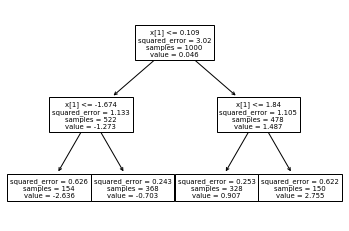

In [26]:
from sklearn.tree import plot_tree
plot_tree(tree1) 

In [27]:
df['leaf_index1'] = tree1.apply(df.iloc[:,0:2])
df

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


,0,1,y,pre1,leaf_index1
988,-1.311944,-0.628121,0,0.5,4
329,-3.710861,-1.437895,1,0.5,4
391,1.963746,-1.905068,1,0.5,3
284,-0.904748,-0.639570,0,0.5,4
49,0.683169,1.256642,0,0.5,5
...,...,...,...,...,...
619,0.134790,1.071066,0,0.5,5
1210,4.494342,2.505806,0,0.5,6
655,0.478224,-0.427845,0,0.5,4
16,2.268477,-2.000489,1,0.5,3


In [28]:
df['leaf_index1'].value_counts()

6    429
4    255
5    221
3     95
Name: leaf_index1, dtype: int64

In [29]:
tree1.tree_.node_count

7

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.109\nsquared_error = 3.02\nsamples = 1000\nvalue = 0.046'),
 Text(0.25, 0.5, 'x[1] <= -1.674\nsquared_error = 1.133\nsamples = 522\nvalue = -1.273'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.626\nsamples = 154\nvalue = -2.636'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.243\nsamples = 368\nvalue = -0.703'),
 Text(0.75, 0.5, 'x[1] <= 1.84\nsquared_error = 1.105\nsamples = 478\nvalue = 1.487'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.253\nsamples = 328\nvalue = 0.907'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.622\nsamples = 150\nvalue = 2.755')]

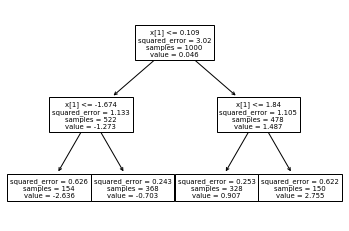

In [30]:
from sklearn.tree import plot_tree
plot_tree(tree1)

In [31]:
X

,x,y
0,4.508317,5.196034
1,4.929828,3.385828
2,1.280754,5.872921
3,5.038466,4.563652
4,0.699756,4.109425
...,...,...
995,NaN,NaN
996,NaN,NaN
997,NaN,NaN
998,NaN,NaN


In [33]:
X['leaf_index1'].value_counts().index

KeyError: ignored

In [36]:
def return_lo():

SyntaxError: ignored

In [37]:
num6 = X[X['leaf_index1'] == 6]['res1'].sum()
den6 = sum(X[X['leaf_index1'] == 6]['pre1'] * (1 - X[X['leaf_index1'] == 6]['pre1']))
num6

KeyError: ignored

In [38]:
round(num6/den6,2)

NameError: ignored

In [39]:
def return_logs(leaf):
  num = df[df['leaf_index1'] == leaf]['res1'].sum()
  den = sum(df[df['leaf_index1'] == leaf]['pre1'] * (1 - df[df['leaf_index1'] == leaf]['pre1']))
  return round(num/den,2)


In [40]:
df['log1'] = df['leaf_index1'].apply(return_logs)
df

KeyError: ignored

In [41]:
df['pre2'] = -0.024 + df['log1']
df['pre2'] = np.exp(df['pre2'])/(1 + np.exp(df['pre2']))
df

KeyError: ignored

In [42]:
df['res2'] = df['y'] - df['pre2']
df

KeyError: ignored